In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
titanic_df=sns.load_dataset("titanic")

In [3]:
titanic_df.head(7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


In [4]:
titanic_df.shape

(891, 15)

In [5]:
titanic_df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

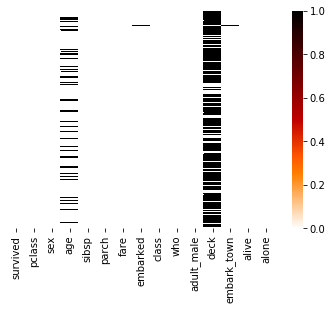

In [13]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cmap="gist_heat_r")

In [17]:
titanic_df.drop("deck",axis=1,inplace=True)

In [18]:
titanic_df.drop("age",axis=1,inplace=True)

In [20]:
titanic_df.dropna(inplace=True)

In [21]:
titanic_df.head(8)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
6,0,1,male,0,0,51.8625,S,First,man,True,Southampton,no,True
7,0,3,male,3,1,21.0750,S,Third,child,False,Southampton,no,False


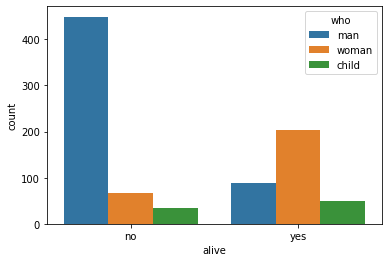

In [24]:

sns.countplot(x="alive",data=titanic_df,hue="who")

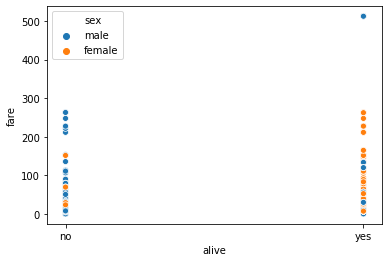

In [30]:
sns.scatterplot(x="alive",y="fare",data=titanic_df,hue="sex")
plt.show()

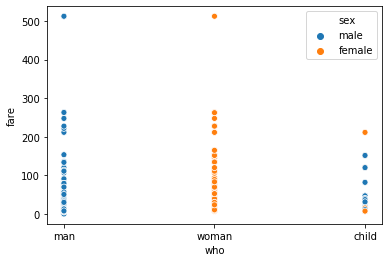

In [32]:
sns.scatterplot(x="who",y="fare",data=titanic_df,hue="sex")

In [33]:
titanic_df.head(2)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False


In [59]:
sex=pd.get_dummies(titanic_df.sex)

In [60]:
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [61]:
sex.drop("female",axis=1,inplace=True)

In [62]:
sex.head(2)

,male
0,1
1,0


In [63]:
embarked=pd.get_dummies(titanic_df.embarked)

In [64]:
embarked.head(2)

,C,Q,S
0,0,0,1
1,1,0,0


In [65]:
embarked.drop("C",axis=1,inplace=True)

In [66]:
embarked.head(2)

,Q,S
0,0,1
1,0,0


In [67]:
titanic_df.drop(["class","who","adult_male","embark_town","alive","alone"],axis=1,inplace=True)

KeyError: "['class' 'who' 'adult_male' 'embark_town' 'alive' 'alone'] not found in axis"

In [68]:
titanic_df.head(2)

,survived,pclass,sex,sibsp,parch,fare,embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C


In [69]:
t_df=pd.concat([titanic_df,sex,embarked],axis=1)

In [70]:
t_df.drop(["sex","embarked"],axis=1,inplace=True)

In [71]:
t_df.head(8)

,survived,pclass,sibsp,parch,fare,male,Q,S
0,0,3,1,0,7.2500,1,0,1
1,1,1,1,0,71.2833,0,0,0
2,1,3,0,0,7.9250,0,0,1
3,1,1,1,0,53.1000,0,0,1
4,0,3,0,0,8.0500,1,0,1
5,0,3,0,0,8.4583,1,1,0
6,0,1,0,0,51.8625,1,0,1
7,0,3,3,1,21.0750,1,0,1


In [72]:
x=t_df
y=titanic_df.survived

In [73]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [76]:
from sklearn import linear_model

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [79]:
from sklearn.linear_model import LogisticRegression
a=LogisticRegression()
a.fit(X_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
a.predict(X_test)

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1], dtype=int64)

In [84]:
y_test

635    1
647    1
566    0
195    1
731    0
      ..
581    1
301    1
255    1
640    0
726    1
Name: survived, Length: 267, dtype: int64

In [86]:
a.score(X_test,y_test)

1.0